# Packages DTSC 575

* PIP - Pip now comes with the standard Python installation
    * PIP
        * Install
            * Package Name
       

# Virtual Environments

Virtual environments are basically directories that have a snapshot of everything Python you need for a project

virtualenv, pipenv, there are many other package managers these are just 2

# Py Sci and Stats Overview

* Overview that going to talk aboust stats and how to do them in Python with Numpy

# Statistics Introduction

In [1]:
import statistics
 
x=[1,2,3]

statistics.mean(x)

2

In [2]:
import numpy as np
y=np.array([1,2,3])
y.mean()

2.0

In [3]:
np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

In [4]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
np.corrcoef(tips.total_bill, tips.tip)

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [6]:
import scipy
r, p=scipy.stats.pearsonr(x,y)
r

0.9999999999999998

# StatsModesl Introduction

## Guerry DataSet

Moral variables on 86 'departments' of France from around 1830



In [8]:
# All done by convention
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

In [9]:
df = sm.datasets.get_rdataset('Guerry', 'HistData').data

In [10]:
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


Are literacy rates associated with lottery wagers?

We're interested in the following:

* Department
* Lottery = per captia wager of Royal Lottery
* Wealth = Per capita tax on personal property
* Region = Region of the country

In [11]:
df2 = df[['Department','Lottery','Literacy','Wealth','Region']]
df2.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [14]:
df2.describe()

,Lottery,Literacy,Wealth
count,86.000000,86.000000,86.000000
mean,43.500000,39.255814,43.500000
std,24.969982,17.364051,24.969982
min,1.000000,12.000000,1.000000
25%,22.250000,25.000000,22.250000
50%,43.500000,38.000000,43.500000
75%,64.750000,51.750000,64.750000
max,86.000000,74.000000,86.000000


## Design Matrices

Generally statsmodels requires two design matrices: endog and exog
* Endog = endogenous
    * Dependent/response variables
* Exog = Exogenous
    * Independent/predictor variables
   

In [15]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [16]:
y

,Lottery
0,41.0
1,38.0
2,66.0
3,80.0
4,79.0
...,...
80,68.0
81,40.0
82,55.0
83,14.0


In [17]:
X

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0
...,...,...,...,...,...,...,...
80,1.0,0.0,0.0,0.0,1.0,28.0,56.0
81,1.0,0.0,0.0,0.0,1.0,25.0,68.0
82,1.0,0.0,0.0,0.0,0.0,13.0,67.0
83,1.0,1.0,0.0,0.0,0.0,62.0,82.0


Modeling is done in three 
1. Describe the model
2. Fit the model
3. Summarize the model

In [18]:
mod = sm.OLS(y, X)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           1.07e-05
Time:                        21:19:14   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [20]:
res.params   # Looks scary like the coeffiecients for a regression equation

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

# T-test



In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
tips.groupby('sex')['total_bill'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,20.744076,9.246469,7.25,14.00,18.35,24.71,50.81
Female,87.0,18.056897,8.009209,3.07,12.75,16.40,21.52,44.30


In [24]:
female=tips.query('sex == "Female"')['total_bill']
male = tips.query('sex=="Male"')['total_bill']

In [25]:
from statsmodels.stats.weightstats import ttest_ind

In [27]:
ttest_ind(female,male)

(-2.2777940289803102, 0.0236116668468596, 242.0)

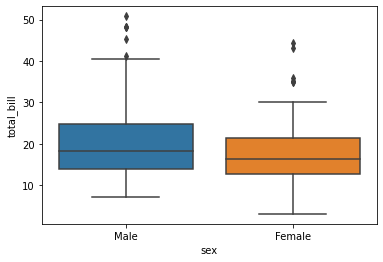

In [28]:
sns.boxplot(x='sex', y= 'total_bill', data = tips);

# ANOVA



In [29]:
from statsmodels.formula.api import ols

In [32]:
model = ols ('Lottery ~ C(Region)', data = df).fit()

aov_table = sm.stats.anova_lm(model, type=2)

aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Region),4.0,7307.011765,1826.752941,3.312945,0.014534
Residual,80.0,44111.882353,551.398529,NaN,NaN


In [33]:
from statsmodels.stats import multicomp

In [35]:
model2 = ols('total_bill ~ day',
            data = tips).fit()

In [36]:
aov_table2 = sm.stats.anova_lm(model2)
print(aov_table2)

             df        sum_sq     mean_sq         F    PR(>F)
day         3.0    643.941362  214.647121  2.767479  0.042454
Residual  240.0  18614.522721   77.560511       NaN       NaN


In [37]:
hsdres = multicomp.pairwise_tukeyhsd(tips.total_bill, tips.day)
print(hsdres)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4541 -2.4799  9.0595  False
   Fri    Sun   4.2584 0.2371 -1.5856 10.1025  False
   Fri   Thur   0.5312 0.9957 -5.4434  6.5057  False
   Sat    Sun   0.9686 0.8968 -2.6088   4.546  False
   Sat   Thur  -2.7586 0.2374 -6.5455  1.0282  False
   Sun   Thur  -3.7273 0.0668 -7.6264  0.1719  False
----------------------------------------------------


# Regression


In [38]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import matplotlib.pyplot as plt

In [39]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


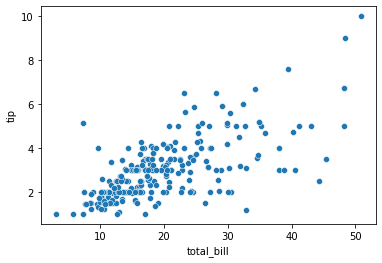

In [40]:
sns.scatterplot(data=tips, x='total_bill',y='tip');

In [41]:
total = tips.total_bill
tip=tips.tip

mod1 = sm.OLS(tip,total)
res1 = mod1.fit()

res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    tip   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              2004.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):                   2.26e-119
Time:                        21:50:32   Log-Likelihood:                         -366.22
No. Observations:                 244   AIC:                                      734.4
Df Residuals:                     243   BIC:                                      737.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.1437      0.003     44.771      0.000       0.137       0.150
==============================================================================
Omnibus:                       21.126   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.017
Skew:                          -0.398   Prob(JB):                     6.17e-11
Kurtosis:                       4.998   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding in a constant

In [42]:
total_constant = sm.add_constant(total, prepend = True)

In [43]:
mod2=sm.OLS(tip, total_constant)
res2=mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           6.69e-34
Time:                        21:54:05   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logistic Regression



In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
tips['sex2'] = np.select([(tips['sex'] == 'Female'), tips['sex'] =='Male'], [0,1])

tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex2
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [47]:
X = tips.loc[:, ['total_bill', 'tip', 'size']]
X = sm.add_constant(X, prepend = True)

y = tips.sex2

In [48]:
mod = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.640304
         Iterations 5


In [49]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   sex2   No. Observations:                  244
Model:                          Logit   Df Residuals:                      240
Method:                           MLE   Df Model:                            3
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                 0.01705
Time:                        21:59:25   Log-Likelihood:                -156.23
converged:                       True   LL-Null:                       -158.94
Covariance Type:            nonrobust   LLR p-value:                    0.1435
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0968      0.423     -0.229      0.819      -0.926       0.733
total_bill     0.0400      0.025      1.631      0.103      -0.008       0.088
tip           -0.0282      0.141     -0.200      0.841      -0.305       0.248
size          -0.0009      0.186     -0.005      0.996      -0.366       0.365
==============================================================================
"""

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
skreg = LogisticRegression()
skreg.fit(X,y)

LogisticRegression()

In [54]:
print(skreg.intercept_)   # these values are a little off from what we have above but the get them in line see next line
# add C=1e8 in the parathesis in the line **skreg = LogisticRegression()
print(skreg.coef_[0]) 

[-0.09721961]
[ 5.75365294e-05  3.99302651e-02 -2.76086725e-02 -9.24010953e-04]


skreg = LogisticRegression(C = 1e8)
skreg.fit(X,y)
print(skreg.intercept_)
print(skreg.coef_[0])

# Py Sci Wrap Up

from Quiz


In [62]:
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(df.Literacy)

TypeError: ttest_ind() missing 1 required positional argument: 'x2'